In [1]:
from __future__ import division
get_ipython().magic(u'matplotlib inline')
%load_ext autoreload
%autoreload 2

import os, sys

path = os.getcwd()
sys.path.append(path + '/Calibration_SW/')
sys.path.append('/Users/Vincent/Documents/FireBallIMO/')
from IPython.display import Image as imdisplay


from focustest import *#PlotFocus2DGuider

In [2]:
FUV = Table.read('/Users/Vincent/Nextcloud/FIREBALL/TestsFTS2018-Flight/data/snape/180831/thrufocus/TotalThroughfocus.csv')
F1 = Table.read('/Users/Vincent/Nextcloud/FIREBALL/TestsFTS2018-Flight/data/guider/180831/FOCUS180831/F1/TotalThroughfocus.csv')
F2 = Table.read('/Users/Vincent/Nextcloud/FIREBALL/TestsFTS2018-Flight/data/guider/180831/FOCUS180831/F2/TotalThroughfocus.csv')
F3 = Table.read('/Users/Vincent/Nextcloud/FIREBALL/TestsFTS2018-Flight/data/guider/180831/FOCUS180831/F3/TotalThroughfocus.csv')
F4 = Table.read('/Users/Vincent/Nextcloud/FIREBALL/TestsFTS2018-Flight/data/guider/180831/FOCUS180831/F4/TotalThroughfocus.csv')

IOError: [Errno 2] No such file or directory: '/Users/Vincent/Nextcloud/FIREBALL/TestsFTS2018-Flight/data/snape/180831/thrufocus/TotalThroughfocus.csv'

In [ ]:
FUV

In [50]:
def DefineBestActuator(table):
    table['id'] = np.arange(len(table))
    data = np.array(np.array(table['Best sigma','Best EE50','Best EE80','Best Maxpix', 'Best Varpix']).tolist())
    mean = np.nanmean(data,axis=1)
    var = np.nanstd(data,axis=1)
    table['MeanBestActuator'] = mean
    table['VarBestActuator'] = var
    return table
FUV = DefineBestActuator(FUV)
F1 = DefineBestActuator(F1)
F2 = DefineBestActuator(F2)
F3 = DefineBestActuator(F3)
F4 = DefineBestActuator(F4)

#FUV.sort('x')
F1.sort('x')
F2.sort('x')
F3.sort('x')
F4.sort('x')
table=FUV

In [19]:
def DetermineWavelength(table):
    table['wavelength'] = -1.0
    #table['id'] = np.arange(len(table))
    for number in np.unique(np.array(table['number'])):
        subtable = table[table['number']==number]
        id213 = subtable[subtable['x']==subtable['x'].min()]['id']
        id202 = subtable[subtable['x']==subtable['x'].max()]['id']
        table['wavelength'][table['id']==id213] = 213.82
        table['wavelength'][table['id']==id202] = 202.55
    table['wavelength'][table['wavelength']==-1.0] = 206.19
    return table

FUV = DetermineWavelength(FUV) 
#FUV[FUV['number']==70.0]

/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice.
  
/Users/Vincent/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Vincent/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Vincent/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/Vincent/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app


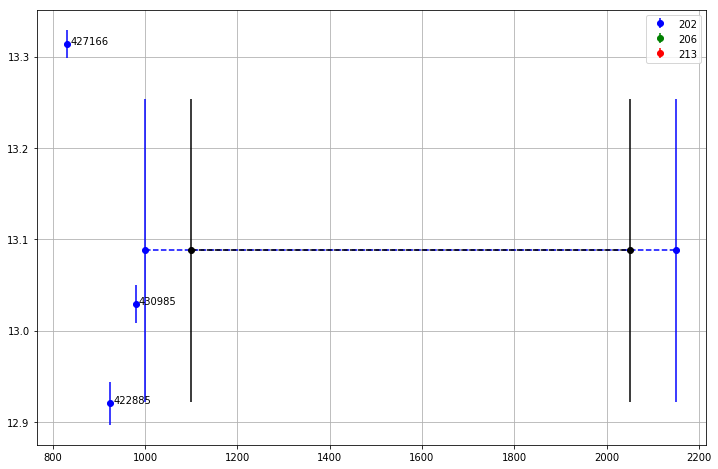

In [20]:
table=FUV[FUV['wavelength']!=213.82]
plt.figure(figsize=(12,8))
#plt.plot(table['x'],table['Best EE80'],'x',label = 'EE80')
#plt.plot(table['x'],table['Best EE50'],'+',label = 'EE50')
#plt.plot(table['x'],table['Best sigma'],'.',label = 'sigma')
plt.errorbar(FUV[FUV['wavelength']==202.55]['x'],FUV[FUV['wavelength']==202.55]['MeanBestActuator'],  fmt='o',yerr = FUV[FUV['wavelength']==202.55]['VarBestActuator'],label = '202',c='blue')
plt.errorbar(FUV[FUV['wavelength']==206.19]['x'],FUV[FUV['wavelength']==206.19]['MeanBestActuator'],  fmt='o',yerr = FUV[FUV['wavelength']==206.19]['VarBestActuator'],label = '206',c='green')
plt.errorbar(FUV[FUV['wavelength']==213.82]['x'],FUV[FUV['wavelength']==213.82]['MeanBestActuator'],  fmt='o',yerr = FUV[FUV['wavelength']==213.82]['VarBestActuator'],label = '213',c='red')
#plt.plot(table['x'],table['Best Maxpix'],'o',label = 'sigma')
#plt.plot(table['x'],table['Best Varpix'],'o',label = 'sigma')
for line in FUV:
    plt.text(line['x']+7, line['MeanBestActuator'], int(line['number']))
plt.errorbar([1000,2150],np.ones(2)*FUV[FUV['wavelength']==202.55]['MeanBestActuator'].mean(),yerr=1*np.ones(2)*FUV[FUV['wavelength']==202.55]['MeanBestActuator'].std(),c='blue',fmt='--o')
plt.errorbar([1050,2100],np.ones(2)*FUV[FUV['wavelength']==206.19]['MeanBestActuator'].mean(),yerr=1*np.ones(2)*FUV[FUV['wavelength']==206.19]['MeanBestActuator'].std(),c='green',fmt='--o')
plt.errorbar([1100,2050],np.ones(2)*FUV[FUV['wavelength']==213.82]['MeanBestActuator'].mean(),yerr=1*np.ones(2)*FUV[FUV['wavelength']==213.82]['MeanBestActuator'].std(),c='red',fmt='--o')
plt.errorbar([1100,2050],np.ones(2)*FUV['MeanBestActuator'].mean(),yerr=1*np.ones(2)*FUV['MeanBestActuator'].std(),c='black',fmt='--o')
plt.legend()
#plt.ylim((15.7,17.2))
plt.grid()
plt.show()

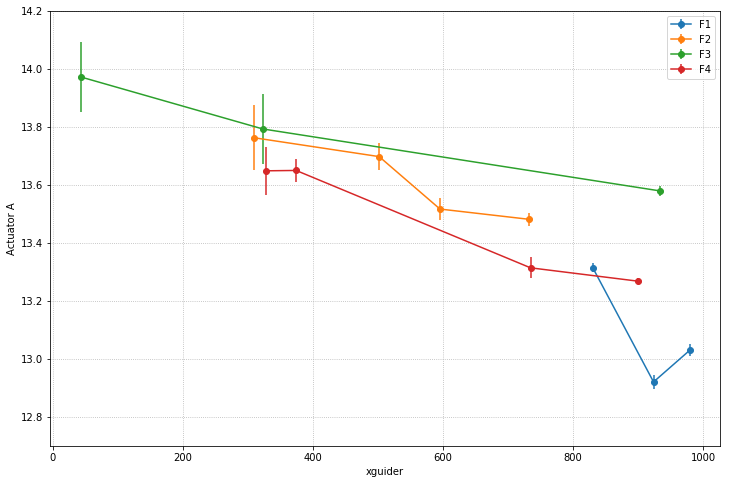

In [21]:
plt.figure(figsize=(12,8))
#plt.errorbar(FUV['x'] - FUV['x'].min(),FUV['MeanBestActuator'],  fmt='.',yerr = FUV['VarBestActuator'],label = 'UV')
plt.errorbar(F1['x'] ,F1['MeanBestActuator'],  fmt='-o',yerr = F1['VarBestActuator'],label = 'F1')
plt.errorbar(F2['x'] ,F2['MeanBestActuator'],  fmt='-o',yerr = F2['VarBestActuator'],label = 'F2')
plt.errorbar(F3['x'] ,F3['MeanBestActuator'],  fmt='-o',yerr = F3['VarBestActuator'],label = 'F3')
plt.errorbar(F4['x'] ,F4['MeanBestActuator'],  fmt='-o',yerr = F4['VarBestActuator'],label = 'F4')
#plt.errorbar([0,1000],np.ones(2)*FUV[FUV['wavelength']==202.55]['MeanBestActuator'].mean(),yerr=1*np.ones(2)*FUV[FUV['wavelength']==202.55]['MeanBestActuator'].std(),c='blue',fmt='--o')

plt.xlabel('xguider')
plt.ylabel('Actuator A')
plt.grid(linestyle = 'dotted')
plt.ylim((15.7-3,17.2-3))
plt.legend()
plt.show()


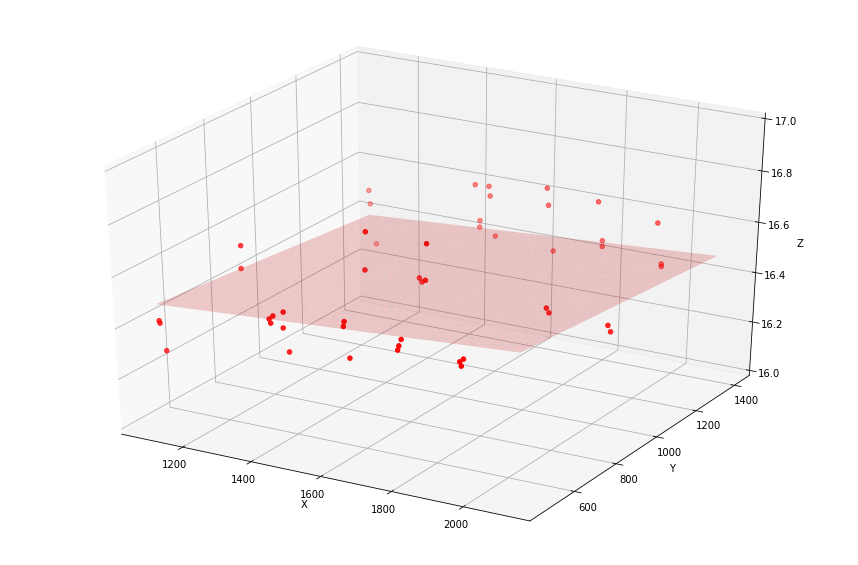

In [8]:
table = FUV
Xdet,Ydet,Zdet, axdet, Cdet = fit_quadratic_curve(table['x'],table['y'],table['MeanBestActuator'],sigma_z = table['VarBestActuator'], n=100,order=1)
axdet.set_zlim(16,17)
plt.show()


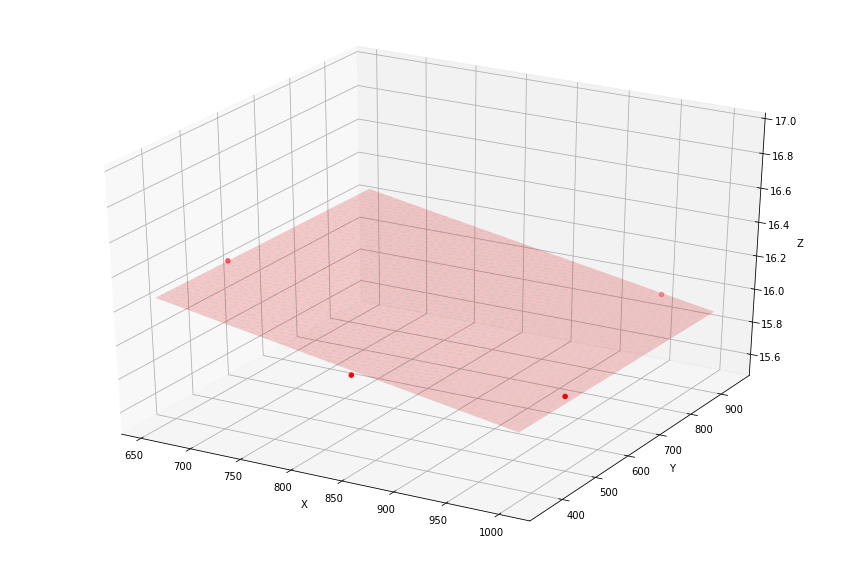

In [12]:
table = F1
X119,Y119,Z119, ax119, Cguider119 = fit_quadratic_curve(table['x'],table['y'],table['MeanBestActuator'],sigma_z = table['VarBestActuator'], n=100,order=1)
ax119.set_zlim(15.5,17)
plt.show()

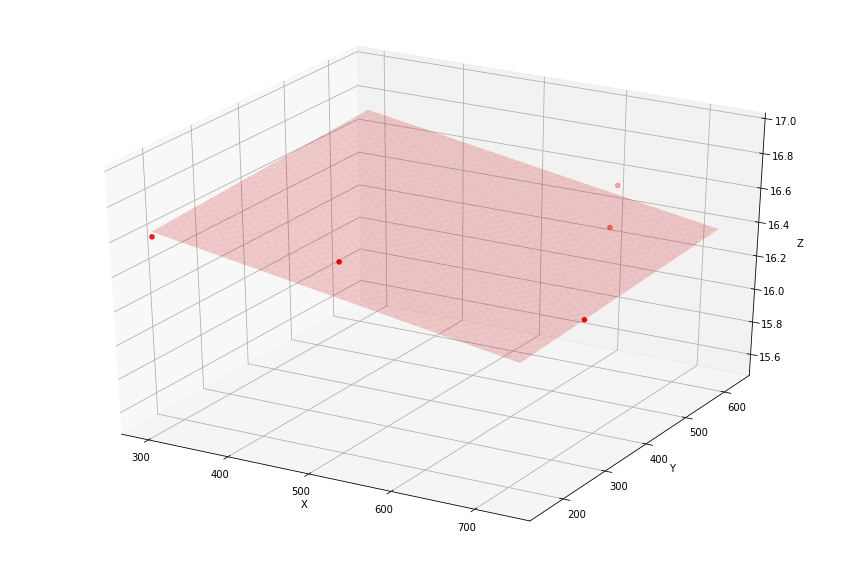

In [13]:
table = F2
X161,Y161,Z161, ax161, Cguider161 = fit_quadratic_curve(table['x'],table['y'],table['MeanBestActuator'],sigma_z = table['VarBestActuator'], n=100,order=1)
ax161.set_zlim(15.5,17)
plt.show()

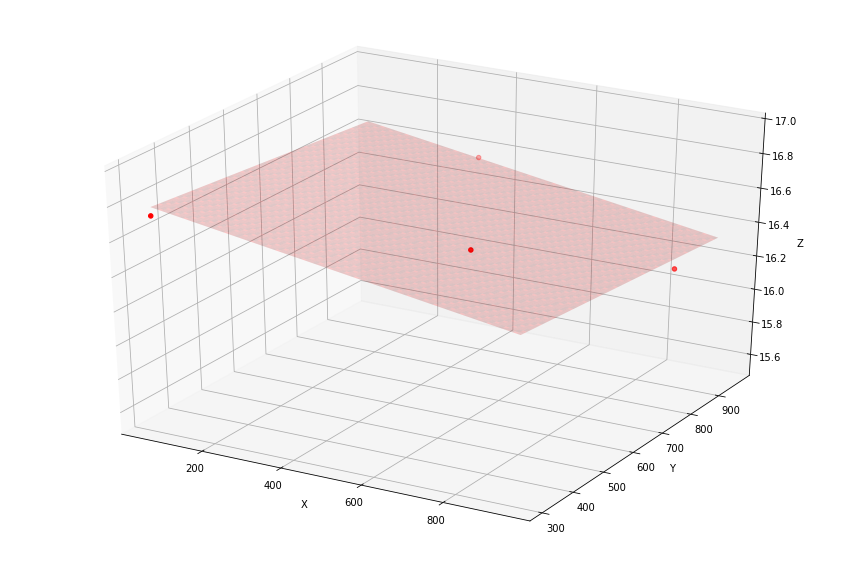

In [14]:
table = F3
X121,Y121,Z121, ax121, Cguider121 = fit_quadratic_curve(table['x'],table['y'],table['MeanBestActuator'],sigma_z = table['VarBestActuator'], n=100,order=1)
ax121.set_zlim(15.5,17)
plt.show()

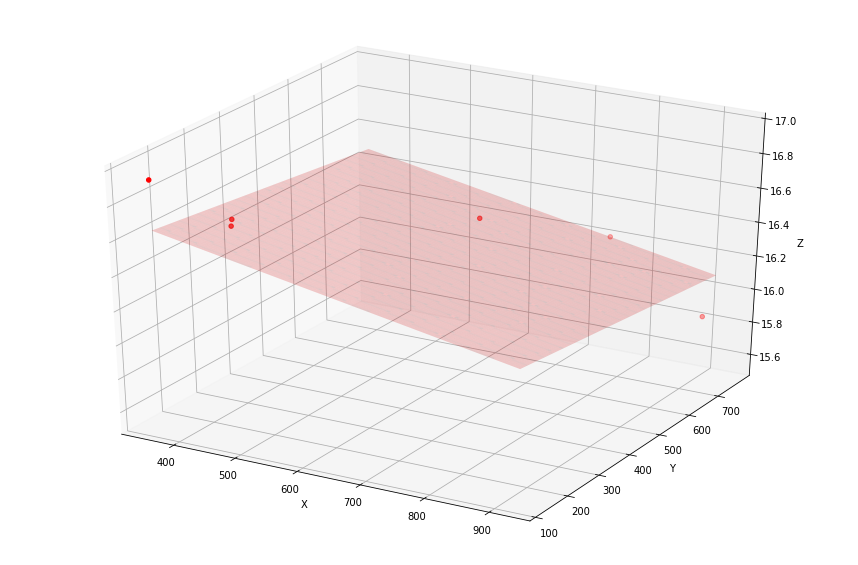

In [15]:
table = F4
X159,Y159,Z159, ax159, Cguider159 = fit_quadratic_curve(table['x'],table['y'],table['MeanBestActuator'],sigma_z = table['VarBestActuator'], n=100,order=1)
ax159.set_zlim(15.5,17)
plt.show()

In [23]:
def PlotFocus2DGuider(path=1, pa=-161,n=22,PlanDetector=None,PlanGuider=None, motors=np.linspace(11.95,14.45,11), dist_max=30, Plot=False, sigma=True,order=1,starsx=None,starsy=None,starsz=None):
    npa = 'pa%+03d'%(pa)
    files = glob.glob(path + '/*' + npa + '*table.fits')[-11:]
    #print (files)
    stars = []
    fwhms = []
    fwhmsvar = []
    size = []    
    actuator = []
    for i,file in enumerate(files):
        header = fits.open(file)[0].header
        actuator.append(header['LINAENC'])
        table = Table.read(file)
        stars.append(np.array([table['X_IMAGE'],table['Y_IMAGE']])) 
        fwhms.append(np.sqrt(np.square(table['FWHM_x']) + np.square(table['FWHM_y']))) 
        fwhmsvar.append(np.sqrt(np.square(table['FWHM_var_x']) + np.square(table['FWHM_var_y']))) 
        size.append(len(stars[-1][0]))

    if Plot:
        plt.figure(figsize=(8,8))  
        for i in range(len(stars)):
            print (i,len(stars[i][0]))
            plt.plot(stars[i][0],stars[i][1],'X',label = '{}'.format(i))
            plt.legend()
        plt.show()
    imageWithMaxStars = np.argmax(size)
    xc,yc = stars[imageWithMaxStars][0],stars[imageWithMaxStars][1]
    fwhmx = np.full((len(xc),11),np.nan)
    fwhmxvar = np.full((len(xc),11),np.nan)
    fwhmx[:,imageWithMaxStars] = fwhms[imageWithMaxStars][1]
    fwhmxvar[:,imageWithMaxStars] = fwhmsvar[imageWithMaxStars][1]
    distance=[]
    index=[]
    for i in range(len(stars)):
        dist,idx = crossmatch(np.array([stars[imageWithMaxStars][0],stars[imageWithMaxStars][1]]).T,np.array([stars[i][0],stars[i][1]]).T,max_distance=dist_max)
        distance.append(dist)
        index.append(idx)
        
    
    for i in range(len(stars)):
        mask = index[i] <  stars[i][0].size
        fwhmx[mask,i] = fwhms[i][index[i][mask]]
        fwhmxvar[mask,i] = fwhmsvar[i][index[i][mask]]
    if Plot:
        plt.figure()
        plt.hist(fwhmx)#,bins = np.linspace(-1,15,40))
        plt.figtext(0.6,0.6,'mean = %0.3f \nsigma = %0.3f'%(np.nanmean(fwhmx),np.sqrt(np.nanvar(fwhmx))))
        plt.show()
    n=3
    cache2sigma = (fwhmx > np.nanmean(fwhmx) + n * np.nanstd(fwhmx)) | (fwhmx < np.nanmean(fwhmx) - n * np.nanstd(fwhmx)) | (fwhmx == 0.0)
    fwhmx[cache2sigma] = np.nan
    f = lambda x,a,b,c: a * (x-b)**2 + c#a * np.square(x) + b * x + c
    if Plot:
        plt.figure()
        plt.plot(actuator,fwhmx.T)
        plt.plot(actuator, f(np.array(actuator),5,13,7),'-o')
        plt.show()
    
    center, popt,pcov, center_sig = [], [], [], [] 
    for star in range (len(fwhmx)):#
        idx =  np.isfinite(fwhmx[star])
        if np.sum(idx)>6:
           opt, cov = curve_fit(f, np.array(actuator)[idx], fwhmx[star][idx], (5, 13,7),  bounds=([0,5,0],[10,20,20]),sigma = np.sqrt(fwhmxvar[star][idx]))
#           opt, cov = curve_fit(f, np.arange(11)[idx], fwhmx[star][idx], (1., 5,1),  bounds=([0,-10,0],[5,20,20]),sigma = np.sqrt(fwhmxvar[star][idx]))
                
        else:
            opt = [np.nan,np.nan,np.nan]
            cov = np.full((3,3),np.nan)
        popt.append(opt)
        pcov.append(cov)
        center.append(opt[1])
        center_sig.append(np.sqrt(cov[1,1]))
    
    
    center = np.array(center)
    center_sig = np.array(center_sig)
#    center_mask = (center < 0) |  (center > 10) |  (np.isnan(center)) 
    center_mask = (center < 10) |  (center > 15) |  (np.isnan(center)) 
    Plot=False
    if sigma:
        x,y,z, ax, C = fit_quadratic_curve(stars[imageWithMaxStars][0][~center_mask],stars[imageWithMaxStars][1][~center_mask],center[~center_mask],sigma_z=None,n=10,order=order,Plot=Plot)#center_sig[~center_mask]
    else:
        x,y,z, ax, C = fit_quadratic_curve(stars[imageWithMaxStars][0][~center_mask],stars[imageWithMaxStars][1][~center_mask],center[~center_mask],sigma_z=center_sig[~center_mask]+1e-1,n=10,order=order,Plot=Plot)#center_sig[~center_mask]

    if Plot==False:
        fig = plt.figure(figsize=(15,10))#(10,8)
        ax = fig.gca(projection='3d')

    if pa==119:
        foc = 18.25#8.5
    if pa==-121:
        foc = 18.99#6
    if pa==-161:
        foc = 18.25#9
    if pa==159:
        foc = 18.50#7.5


    
    if  PlanDetector is not None:  
        #offsetDet = (18.996 - PlanDetector[0]*903 + PlanDetector[1]*685)
        #offsetGuider = (foc - PlanDetector[0]*903 + PlanDetector[1]*685)#18.25#8.5
        #detfocus = PlanDetector[0]*x + PlanDetector[1]*y + offsetDet
        #focus = PlanDetector[0]*x + PlanDetector[1]*y + offsetGuider
        detfocus = PlanDetector[0]*x + PlanDetector[1]*y + PlanDetector[2]

    if  PlanGuider is not None:  
        detguider = PlanGuider[0]*x + PlanGuider[1]*y + PlanGuider[2]


    Zfocus = np.ones((z.shape))
    if order==1:
        autocf = C[0]*903 + C[1]*685 + C[2]
#        ax.plot(np.ones(2)*903, np.ones(2)*685, np.linspace(focus,focus,2),linewidth=6,c='red')
        #ax.scatter(np.ones(2)*903, np.ones(2)*685, np.linspace(autocf,autocf,2), c='b', s=100)
    if order==2:
        autocf = np.dot(np.c_[1, 903, 685, 903*685, 903**2, 685**2], C)
#        ax.plot(np.ones(2)*903, np.ones(2)*685, np.linspace(focus,focus,2),linewidth=6,c='red')
        #ax.scatter(np.ones(2)*903, np.ones(2)*685, np.linspace(autocf,autocf,2), c='b', s=100)
    diffInfAutoc = (foc-autocf)

    focstar_Autocoll_guider = []
    focstar_Autocoll_detector = []
    for xstar, ystar in zip(starsx,starsy):
        if order==1:
            defocus = C[0]*xstar + C[1]*ystar + C[2] 
        if order==2:
            defocus = np.dot(np.c_[1, xstar, ystar, xstar*ystar, xstar**2, ystar**2], C)
#        ax.plot(np.ones(2)*xstar, np.ones(2)*ystar, np.linspace(focus,defocus,2),linewidth=6,c='black')
        guider = PlanGuider[0]*xstar + PlanGuider[1]*ystar + PlanGuider[2]
        detector = PlanDetector[0]*xstar + PlanDetector[1]*ystar + PlanDetector[2]
        
        focstar_Autocoll_guider.append(guider)
        focstar_Autocoll_detector.append(detector)

  
        #ax.plot(np.ones(2)*xstar, np.ones(2)*ystar, np.linspace(focstar_Autocoll,defocus,2),linewidth=6,c='black')#focstar-diffInfAutoc
        #ax.scatter(np.ones(2)*xstar, np.ones(2)*ystar, np.linspace(guider-diffInfAutoc,guider-diffInfAutoc,2), c='black', s=100)

#    diffInfAutoc = np.square(np.array(focstar_Autocoll_guider) - np.array(defocus)).mean()
#    diffInfAutoc = np.sqrt(diffInfAutoc)
#    diff_focus_GD_on_stars = np.square(np.array(focstar_Autocoll_guider) - np.array(focstar_Autocoll_detector)).mean()  
#    diff_focus_GD_on_stars = np.sqrt(diff_focus_GD_on_stars) 
    diffInfAutoc = (np.array(focstar_Autocoll_guider) - np.array(defocus)).mean()
    diff_focus_GD_on_stars = (np.array(focstar_Autocoll_guider) - np.array(focstar_Autocoll_detector)).mean()  

#    for xstar, ystar in zip(starsx,starsy):    
#        ax.scatter(np.ones(2)*xstar, np.ones(2)*ystar, np.linspace(defocus+ 1*diffInfAutoc,defocus+ 1*diffInfAutoc,2), c='black', s=100)
    ax.scatter(starsx, starsy, starsz, c='black', s=100)
    print(starsx, starsy, starsz)


    
    ax.text(9, 0, 14.5, 'Infinite to autocoll focal plane: %0.3f actuator mm '%(diffInfAutoc), color='red',fontsize=12)
    ax.text(9, 0, 15, 'Guide star focus to UV focus: %0.3f actuator mm '%(diff_focus_GD_on_stars), color='red',fontsize=14)
    
    ax.plot_surface(x, y, Zfocus * detfocus - 0*diffInfAutoc, rstride=1, cstride=1, alpha=0.2,color='b',label='Detector focus autocol')
    ax.plot_surface(x, y, Zfocus * detguider - 0*diffInfAutoc, rstride=1, cstride=1, alpha=0.2,color='r',label='Guider focus autocol')
    ax.plot_surface(x, y, z + 1*diffInfAutoc, rstride=1, cstride=1, alpha=0.2,color='r',label='Guider mask shape on sky')

    ax.scatter(stars[imageWithMaxStars][0][~center_mask],stars[imageWithMaxStars][1][~center_mask],center[~center_mask]+ 1*diffInfAutoc, c='r', s=20)
    
    ax.view_init(azim=-90,elev=0)
    plt.title(npa)
    plt.show()
    print("""
    ********************************************************************
                        Exited OK     
    ********************************************************************
    """) 
    print('In autocoll:')
    print('Mean position of the UV detector focal plane: {}'.format(detfocus.mean()))
    print('Mean position of the guider focal plane at stars position: {}'.format(np.array(focstar_Autocoll_guider).mean()))
    return x,y,z,C,Zfocus * detfocus , Zfocus * detfocus

/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in greater
/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in less
/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in less
/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in greater


TypeError: 'NoneType' object has no attribute '__getitem__'

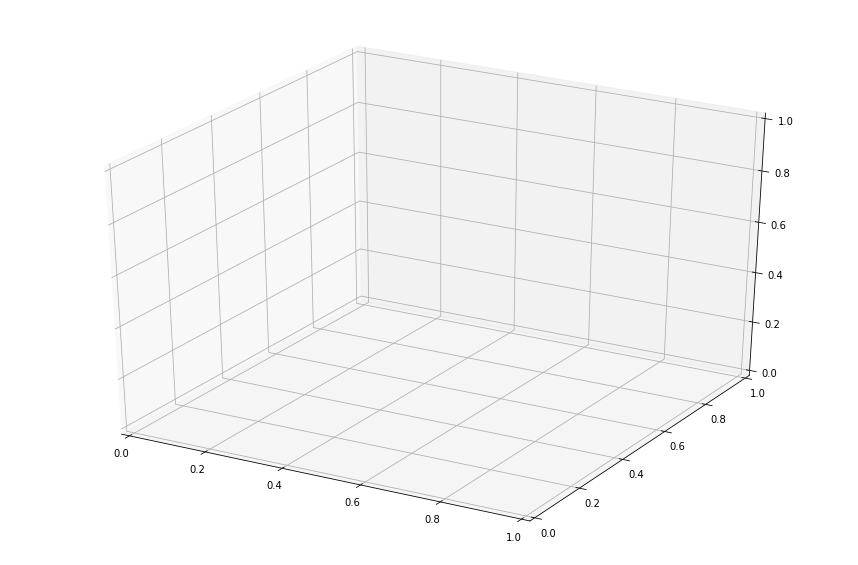

In [11]:
table = F1
path = '/Users/Vincent/Nextcloud/FIREBALL/TestsFTS2018/AIT-Optical-FTS-201805/FBGuider2018_NEW/OpenCluster/F1/'
#x,y,z,C = PlotFocus2DGuider(path=path, pa=119,sigma=True,order=2,starsx=starsxF1,starsy=starsyF1)#Cguider119
x1,y1,z1,C1, focus11, focus12 = PlotFocus2DGuider(path=path,PlanDetector=Cdet, PlanGuider=None, pa=119,sigma=True,order=2,starsx=table['x'],starsy=table['y'],starsz=table['MeanBestActuator'],Plot=False)



/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in greater
/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in less
/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in less
/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in greater


(<Column name='x' dtype='float64' length=5>
297.4709777832031
493.8756103515625
 609.717041015625
642.6055297851562
732.9691772460938, <Column name='y' dtype='float64' length=5>
 157.7067108154297
209.45941162109375
 631.8982543945312
 547.0521850585938
 304.1048583984375, <Column name='MeanBestActuator' dtype='float64' length=5>
 16.61394453048706
16.572487354278564
16.531658172607422
16.428642908732098
16.323115666707356)


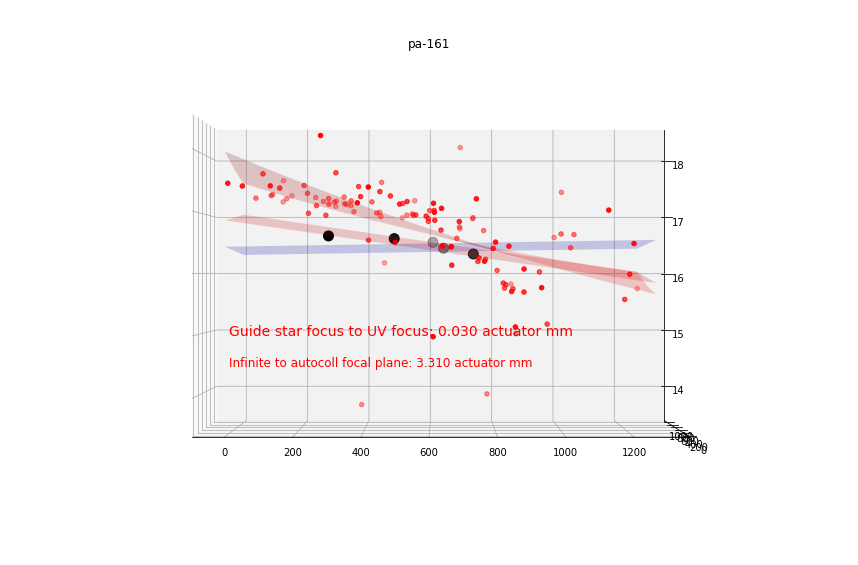


    ********************************************************************
                        Exited OK     
    ********************************************************************
    
In autocoll:
Mean position of the UV detector focal plane: 16.4361381174
Mean position of the guider focal plane at stars position: 16.4755135141


In [32]:
table = F2
path = '/Users/Vincent/Nextcloud/FIREBALL/TestsFTS2018/AIT-Optical-FTS-201805/FBGuider2018_NEW/OpenCluster/F2/'
#x,y,z,C = PlotFocus2DGuider(path=path, pa=119,sigma=True,order=2,starsx=starsxF1,starsy=starsyF1)
x2,y2,z2,C2, focus21, focus22 = PlotFocus2DGuider(path=path,PlanDetector=Cdet, PlanGuider=Cguider161, pa=-161,sigma=True,order=2,starsx=table['x'],starsy=table['y'],starsz=table['MeanBestActuator'],Plot=False)



/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in greater
/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in less
/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in less
/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in greater


(<Column name='x' dtype='float64' length=4>
57.531673431396484
 342.7613830566406
 642.1136474609375
 943.7821044921875, <Column name='y' dtype='float64' length=4>
  308.94775390625
964.2512817382812
549.6488037109375
812.3062744140625, <Column name='MeanBestActuator' dtype='float64' length=4>
 16.73266363143921
16.553643703460693
 16.54798984527588
 16.30050214131673)


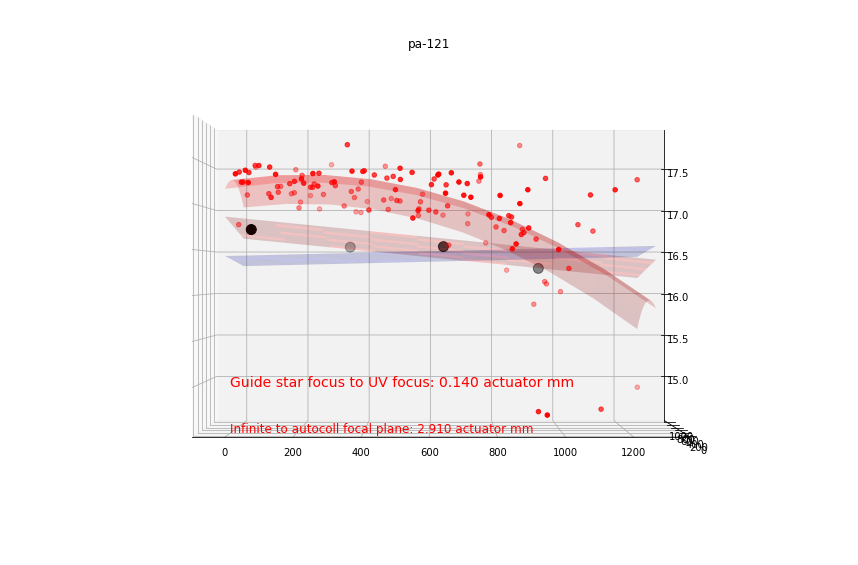


    ********************************************************************
                        Exited OK     
    ********************************************************************
    
In autocoll:
Mean position of the UV detector focal plane: 16.4353589109
Mean position of the guider focal plane at stars position: 16.5532299029


In [16]:
table = F3
path = '/Users/Vincent/Nextcloud/FIREBALL/TestsFTS2018/AIT-Optical-FTS-201805/FBGuider2018_NEW/OpenCluster/F3/'
#x,y,z,C = PlotFocus2DGuider(path=path, pa=119,sigma=True,order=2,starsx=starsxF1,starsy=starsyF1)
x3,y3,z3,C3, focus31, focus32 = PlotFocus2DGuider(path=path,PlanDetector=Cdet, PlanGuider=Cguider121, pa=-121,sigma=True,order=2,starsx=table['x'],starsy=table['y'],starsz=table['MeanBestActuator'],Plot=False)



/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in greater
/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in less
/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in less
/Users/Vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in greater


(<Column name='x' dtype='float64' length=6>
355.3277282714844
 395.976318359375
397.3794250488281
 650.424072265625
751.7808227539062
921.0274047851562, <Column name='y' dtype='float64' length=6>
129.49057006835938
 278.6889953613281
 278.9085998535156
 544.7064208984375
 764.7320556640625
 722.9619750976562, <Column name='MeanBestActuator' dtype='float64' length=6>
 16.93429660797119
 16.54798460006714
16.587563037872314
16.489573001861572
 16.22010040283203
15.901005109151205)


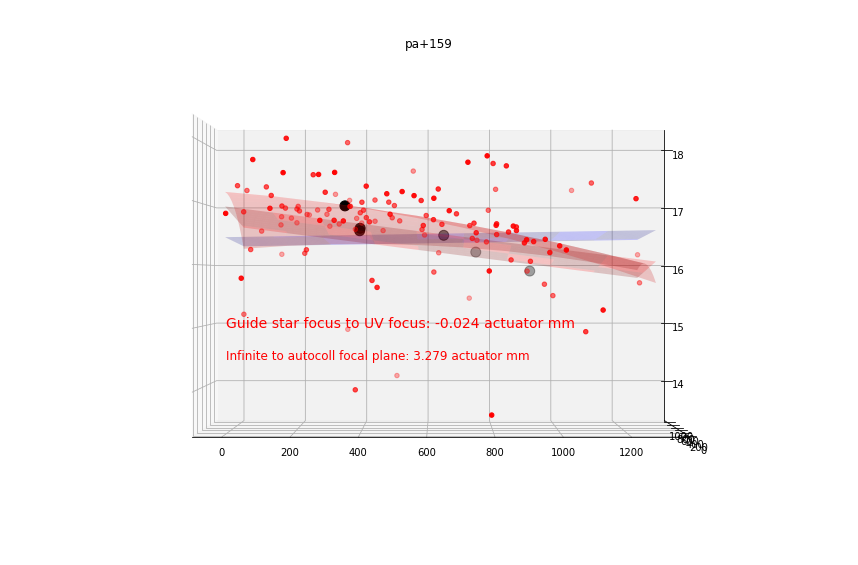


    ********************************************************************
                        Exited OK     
    ********************************************************************
    
In autocoll:
Mean position of the UV detector focal plane: 16.4358217035
Mean position of the guider focal plane at stars position: 16.4161418639


In [17]:
table = F4
path = '/Users/Vincent/Nextcloud/FIREBALL/TestsFTS2018/AIT-Optical-FTS-201805/FBGuider2018_NEW/OpenCluster/F4/'
#x,y,z,C = PlotFocus2DGuider(path=path, pa=119,sigma=True,order=2,starsx=starsxF1,starsy=starsyF1)
x4,y4,z4,C4, focus41, focus42 = PlotFocus2DGuider(path=path,PlanDetector=Cdet, PlanGuider=Cguider159, pa=159,sigma=True,order=2,starsx=table['x'],starsy=table['y'],starsz=table['MeanBestActuator'],Plot=False)



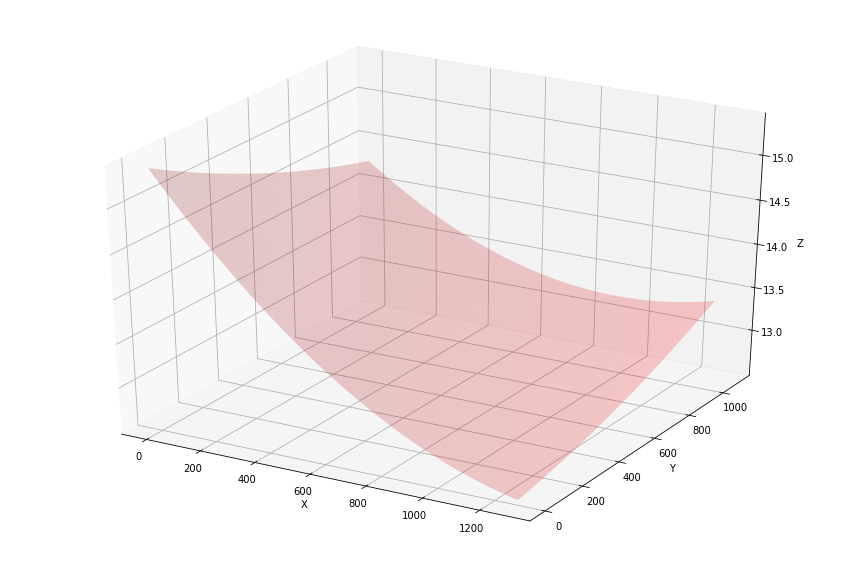

In [20]:
n=100
X,Y = np.meshgrid(np.linspace(0, 1280, n), np.linspace(0, 1080, n))
XX = X.flatten()
YY = Y.flatten()
Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C1).reshape(X.shape)
fig = plt.figure(figsize=(15,10))#(10,8)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2,color = 'r')
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
#ax.set_zlim(15.5,17)
fig.show()

In [ ]:
np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C1).reshape(X.shape)

2.9860741876711145
3.014919737500371
2.7819265454579245
3.0427098351765594


In [24]:
C1 = np.array([ 1.54031096e+01, -3.82715642e-03, -1.40537695e-03,  1.43447970e-06,
        1.23090232e-06,  3.43395171e-07])
C2 = np.array([ 1.46496302e+01, -2.29074434e-03, -4.66298362e-04,  5.49896550e-07,
        3.79924162e-07,  1.03739260e-07])
C3 = np.array([ 1.42444943e+01,  5.88362849e-04,  6.47053557e-04, -1.11508566e-07,
       -1.27030368e-06, -7.05465095e-07])
C4 = np.array([ 1.38679740e+01, -4.18159175e-04, -2.12546360e-05,  7.98627637e-07,
       -5.69276096e-07, -7.24762720e-07])

In [25]:
xc, yc = 640, 540
table, C = F1, C1
ff = np.dot(np.c_[np.ones(table['x'].shape), table['x'], table['y'], table['x']*table['y'], table['x']**2, table['y']**2], C).reshape(table['x'].shape)
ffc = np.dot(np.c_[1, xc,yc, xc*yc,xc**2, yc**2], C)#.reshape(table['x'].shape)
diff1 = table['MeanBestActuator'] - (ff/2 + ffc/2)
print('F1: mean = {}, std = {}'.format(diff1.mean(),diff1.std()))

table, C = F2, C2
ff = np.dot(np.c_[np.ones(table['x'].shape), table['x'], table['y'], table['x']*table['y'], table['x']**2, table['y']**2], C).reshape(table['x'].shape)
ffc = np.dot(np.c_[1, xc,yc, xc*yc,xc**2, yc**2], C)#.reshape(table['x'].shape)
#diff = table['MeanBestActuator'] - np.dot(np.c_[np.ones(table['x'].shape), table['x'], table['y'], table['x']*table['y'], table['x']**2, table['y']**2], C2).reshape(table['x'].shape)
diff2 = table['MeanBestActuator'] - (ff/2 + ffc/2)
print('F2: mean = {}, std = {}'.format(diff2.mean(),diff2.std()))

table, C = F3, C3
ff = np.dot(np.c_[np.ones(table['x'].shape), table['x'], table['y'], table['x']*table['y'], table['x']**2, table['y']**2], C).reshape(table['x'].shape)
ffc = np.dot(np.c_[1, xc,yc, xc*yc,xc**2, yc**2], C)#.reshape(table['x'].shape)
#diff = table['MeanBestActuator'] - np.dot(np.c_[np.ones(table['x'].shape), table['x'], table['y'], table['x']*table['y'], table['x']**2, table['y']**2], C3).reshape(table['x'].shape)
diff3 = table['MeanBestActuator'] - (ff/2 + ffc/2)
print('F3: mean = {}, std = {}'.format(diff3.mean(),diff3.std()))

table, C = F4, C4
ff = np.dot(np.c_[np.ones(table['x'].shape), table['x'], table['y'], table['x']*table['y'], table['x']**2, table['y']**2], C).reshape(table['x'].shape)
ffc = np.dot(np.c_[1, xc,yc, xc*yc,xc**2, yc**2], C)#.reshape(table['x'].shape)
#diff = table['MeanBestActuator'] - np.dot(np.c_[np.ones(table['x'].shape), table['x'], table['y'], table['x']*table['y'], table['x']**2, table['y']**2], C4).reshape(table['x'].shape)
diff4 = table['MeanBestActuator'] - (ff/2 + ffc/2)
print('F4: mean = {}, std = {}'.format(diff4.mean(),diff4.std()))

#Prendre Z/2 / Zc/2

F1: mean = -0.0700556550637, std = 0.177754752407
F2: mean = 0.203082520153, std = 0.0511947993189
F3: mean = -0.381593473212, std = 0.0534660054786
F4: mean = 0.0340194016758, std = 0.0701420449204


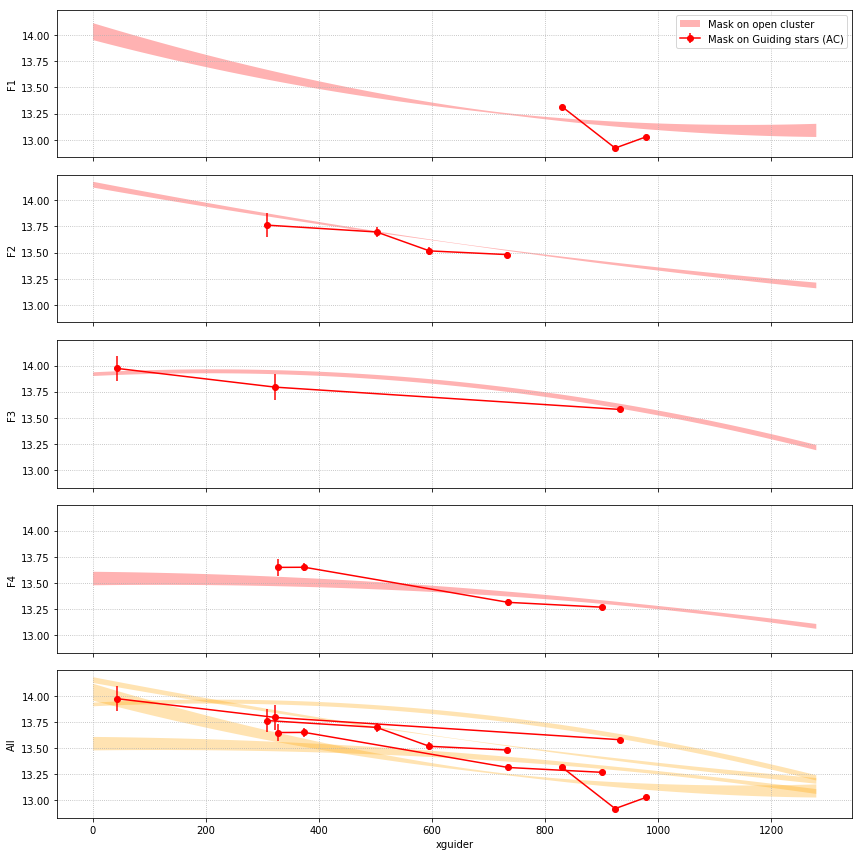

In [26]:
#n=100
C=C4
X,Y = np.meshgrid(np.linspace(0, 1280, 1280), np.linspace(0, 1080, 1080))
XX = X.flatten()
YY = Y.flatten()
Z4 = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C4).reshape(X.shape)
Z3 = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C3).reshape(X.shape)
Z2 = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C2).reshape(X.shape)
Z1 = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C1).reshape(X.shape)

Z4 = Z4/2 + Z4[int(1280/2),int(1080/2)]/2
Z3 = Z3/2 + Z3[int(1280/2),int(1080/2)]/2
Z2 = Z2/2 + Z2[int(1280/2),int(1080/2)]/2
Z1 = Z1/2 + Z1[int(1280/2),int(1080/2)]/2

#plt.figure(figsize=(12,8))
fig, ax = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(12,12))
x = np.linspace(0, 1280, 1280)

#ax[0].errorbar([0,1280],np.ones(2)*FUV['MeanBestActuator'].mean(),yerr=1*np.ones(2)*FUV['MeanBestActuator'].std(),fmt='--o',label='UV detector')
#ax[1].errorbar([0,1280],np.ones(2)*FUV['MeanBestActuator'].mean(),yerr=1*np.ones(2)*FUV['MeanBestActuator'].std(),fmt='--o')
#ax[2].errorbar([0,1280],np.ones(2)*FUV['MeanBestActuator'].mean(),yerr=1*np.ones(2)*FUV['MeanBestActuator'].std(),fmt='--o')
#ax[3].errorbar([0,1280],np.ones(2)*FUV['MeanBestActuator'].mean(),yerr=1*np.ones(2)*FUV['MeanBestActuator'].std(),fmt='--o')
#ax[4].errorbar([0,1280],np.ones(2)*FUV['MeanBestActuator'].mean(),yerr=1*np.ones(2)*FUV['MeanBestActuator'].std(),fmt='--o')



ax[3].fill_between(x, Z4.mean(axis=0) + diff4.mean() - Z4.std(axis=0)/2, Z4.mean(axis=0) + diff4.mean() + Z4.std(axis=0)/2,alpha=0.3,facecolor='r') 
#ax[3].fill_between(x, Z44.mean(axis=0) + diff4.mean() - Z44.std(axis=0)/2, Z44.mean(axis=0) + diff4.mean() + Z44.std(axis=0)/2,alpha=0.3) 
#ax[2].fill_between(x, Z3.mean(axis=0) + diff2.mean() - Z3.std(axis=0)/2, Z3.mean(axis=0) + diff4.mean() + Z3.std(axis=0)/2,alpha=0.3) 
ax[2].fill_between(x, Z3.mean(axis=0) + diff3.mean() - Z3.std(axis=0)/2, Z3.mean(axis=0) + diff3.mean() + Z3.std(axis=0)/2,alpha=0.3,facecolor='r') 
ax[1].fill_between(x, Z2.mean(axis=0) + diff2.mean() - Z2.std(axis=0)/2, Z2.mean(axis=0) + diff2.mean() + Z2.std(axis=0)/2,alpha=0.3,facecolor='r') 
ax[0].fill_between(x, Z1.mean(axis=0) + diff1.mean() - Z1.std(axis=0)/2, Z1.mean(axis=0) + diff1.mean() + Z1.std(axis=0)/2,alpha=0.3,facecolor='r',label='Mask on open cluster') 


plt.xlabel('xguider')
plt.ylabel('Actuator A')
ax[3].errorbar(F4['x'] ,F4['MeanBestActuator'],  fmt='-o',yerr = F4['VarBestActuator'],label = 'F4',c='r')
ax[2].errorbar(F3['x'] ,F3['MeanBestActuator'],  fmt='-o',yerr = F3['VarBestActuator'],label = 'F3',c='r')
ax[1].errorbar(F2['x'] ,F2['MeanBestActuator'],  fmt='-o',yerr = F2['VarBestActuator'],label = 'F2',c='r')
ax[0].errorbar(F1['x'] ,F1['MeanBestActuator'],  fmt='-o',yerr = F1['VarBestActuator'],c='r',label='Mask on Guiding stars (AC)') 
ax[0].grid(linestyle = 'dotted');ax[1].grid(linestyle = 'dotted');ax[2].grid(linestyle = 'dotted');ax[3].grid(linestyle = 'dotted');ax[4].grid(linestyle = 'dotted')
ax[0].set_ylabel('F1');ax[1].set_ylabel('F2');ax[2].set_ylabel('F3');ax[3].set_ylabel('F4');ax[4].set_ylabel('All')








ax[4].fill_between(x, Z4.mean(axis=0) + diff4.mean() - Z4.std(axis=0)/2, Z4.mean(axis=0) + diff4.mean() + Z4.std(axis=0)/2,alpha=0.3,facecolor='orange') 
ax[4].fill_between(x, Z3.mean(axis=0) + diff3.mean() - Z3.std(axis=0)/2, Z3.mean(axis=0) + diff3.mean() + Z3.std(axis=0)/2,alpha=0.3,facecolor='orange')
ax[4].fill_between(x, Z2.mean(axis=0) + diff2.mean() - Z2.std(axis=0)/2, Z2.mean(axis=0) + diff2.mean() + Z2.std(axis=0)/2,alpha=0.3,facecolor='orange')
ax[4].fill_between(x, Z1.mean(axis=0) + diff1.mean() - Z1.std(axis=0)/2, Z1.mean(axis=0) + diff1.mean() + Z1.std(axis=0)/2,alpha=0.3,facecolor='orange')
ax[4].errorbar(F4['x'] ,F4['MeanBestActuator'],  fmt='-o',yerr = F4['VarBestActuator'],label = 'F4',c='r')
ax[4].errorbar(F3['x'] ,F3['MeanBestActuator'],  fmt='-o',yerr = F3['VarBestActuator'],label = 'F3',c='r')
ax[4].errorbar(F2['x'] ,F2['MeanBestActuator'],  fmt='-o',yerr = F2['VarBestActuator'],label = 'F2',c='r')
ax[4].errorbar(F1['x'] ,F1['MeanBestActuator'],  fmt='-o',yerr = F1['VarBestActuator'],label = 'F1',c='r')

fig.tight_layout()
#plt.ylim((11.85,14.45))
#plt.ylim((15.5,17))
ax[0].legend()
plt.show()

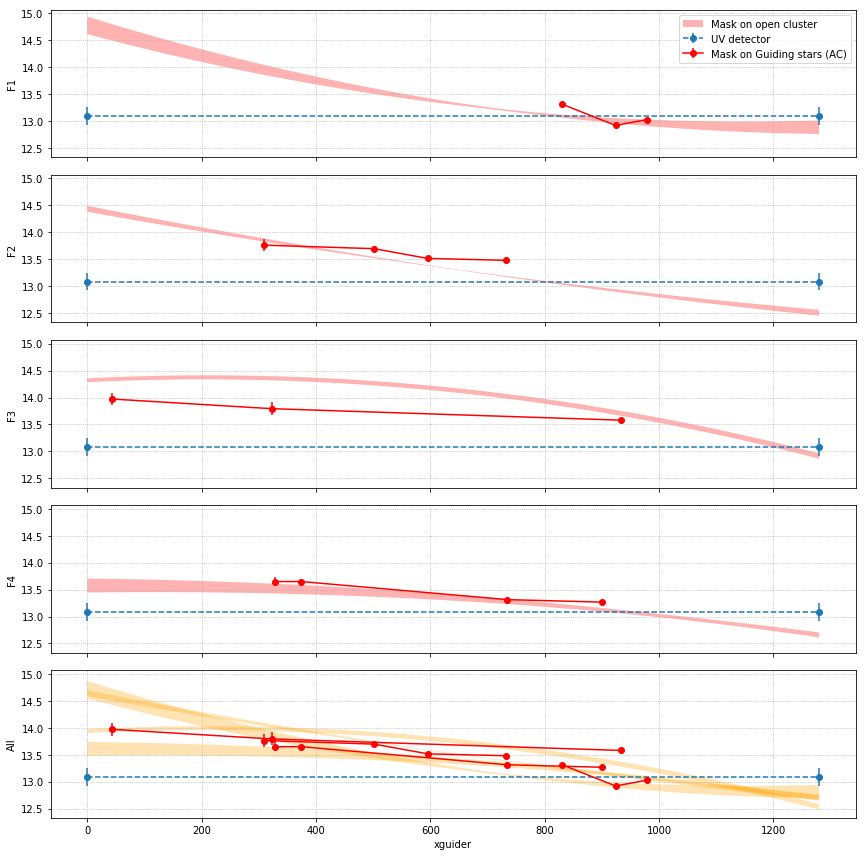

In [29]:
#n=100
C=C4
X,Y = np.meshgrid(np.linspace(0, 1280, 1280), np.linspace(0, 1080, 1080))
XX = X.flatten()
YY = Y.flatten()
Z4 = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C4).reshape(X.shape)
Z3 = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C3).reshape(X.shape)
Z2 = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C2).reshape(X.shape)
Z1 = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C1).reshape(X.shape)

#plt.figure(figsize=(12,8))
fig, ax = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(12,12))
x = np.linspace(0, 1280, 1280)
#plt.errorbar(np.linspace(0, 1280, n), Z1.mean(axis=0) + diff1.mean(),yerr=Z1.std(axis=0))
#plt.errorbar(np.linspace(0, 1280, n), Z2.mean(axis=0) + diff2.mean(),yerr=Z2.std(axis=0))
#plt.errorbar(np.linspace(0, 1280, n), Z3.mean(axis=0) + diff3.mean(),yerr=Z3.std(axis=0))
#plt.errorbar(np.linspace(0, 1280, n), Z4.mean(axis=0) + diff4.mean(),yerr=Z4.std(axis=0))
#ax[4].plot(x, Z1.mean(axis=0) + diff1.mean())#,yerr=Z1.std(axis=0))
#ax[4].plot(x, Z2.mean(axis=0) + diff2.mean())#,yerr=Z2.std(axis=0))
#ax[4].plot(x, Z3.mean(axis=0) + diff3.mean())#,yerr=Z3.std(axis=0))
#ax[4].plot(x, Z4.mean(axis=0) + diff4.mean())#,yerr=Z4.std(axis=0))

ax[0].errorbar([0,1280],np.ones(2)*FUV['MeanBestActuator'].mean() ,yerr=1*np.ones(2)*FUV['MeanBestActuator'].std(),fmt='--o',label='UV detector')
ax[1].errorbar([0,1280],np.ones(2)*FUV['MeanBestActuator'].mean() ,yerr=1*np.ones(2)*FUV['MeanBestActuator'].std(),fmt='--o')
ax[2].errorbar([0,1280],np.ones(2)*FUV['MeanBestActuator'].mean() ,yerr=1*np.ones(2)*FUV['MeanBestActuator'].std(),fmt='--o')
ax[3].errorbar([0,1280],np.ones(2)*FUV['MeanBestActuator'].mean() ,yerr=1*np.ones(2)*FUV['MeanBestActuator'].std(),fmt='--o')
ax[4].errorbar([0,1280],np.ones(2)*FUV['MeanBestActuator'].mean() ,yerr=1*np.ones(2)*FUV['MeanBestActuator'].std(),fmt='--o')



ax[3].fill_between(x, Z4.mean(axis=0) - Z4.std(axis=0)/2, Z4.mean(axis=0) + Z4.std(axis=0)/2,alpha=0.3,facecolor='r') 
#ax[3].fill_between(x, Z44.mean(axis=0) + diff4.mean() - Z44.std(axis=0)/2, Z44.mean(axis=0) + diff4.mean() + Z44.std(axis=0)/2,alpha=0.3) 
#ax[2].fill_between(x, Z3.mean(axis=0) + diff2.mean() - Z3.std(axis=0)/2, Z3.mean(axis=0) + diff4.mean() + Z3.std(axis=0)/2,alpha=0.3) 
ax[2].fill_between(x, Z3.mean(axis=0) - Z3.std(axis=0)/2, Z3.mean(axis=0) + Z3.std(axis=0)/2,alpha=0.3,facecolor='r') 
ax[1].fill_between(x, Z2.mean(axis=0) - Z2.std(axis=0)/2, Z2.mean(axis=0) + Z2.std(axis=0)/2,alpha=0.3,facecolor='r') 
ax[0].fill_between(x, Z1.mean(axis=0) - Z1.std(axis=0)/2, Z1.mean(axis=0) + Z1.std(axis=0)/2,alpha=0.3,facecolor='r',label='Mask on open cluster') 


plt.xlabel('xguider')
plt.ylabel('Actuator A')#- (FUV['MeanBestActuator'].mean()-F4['MeanBestActuator'])
ax[3].errorbar(F4['x'] ,F4['MeanBestActuator'],  fmt='-o',yerr = F4['VarBestActuator'],label = 'F4',c='r')
ax[2].errorbar(F3['x'] ,F3['MeanBestActuator'] ,  fmt='-o',yerr = F3['VarBestActuator'],label = 'F3',c='r')
ax[1].errorbar(F2['x'] ,F2['MeanBestActuator']  ,  fmt='-o',yerr = F2['VarBestActuator'],label = 'F2',c='r')
#ax[0].errorbar(F1['x'] ,F1['MeanBestActuator']  - (FUV['MeanBestActuator'].mean()-F1['MeanBestActuator']) - diff1.mean(),  fmt='-o',yerr = F1['VarBestActuator'],c='r',label='Mask on Guiding stars (AC)') 
ax[0].errorbar(F1['x'] ,F1['MeanBestActuator']  ,  fmt='-o',yerr = F1['VarBestActuator'],c='r',label='Mask on Guiding stars (AC)') 
ax[0].grid(linestyle = 'dotted');ax[1].grid(linestyle = 'dotted');ax[2].grid(linestyle = 'dotted');ax[3].grid(linestyle = 'dotted');ax[4].grid(linestyle = 'dotted')
ax[0].set_ylabel('F1');ax[1].set_ylabel('F2');ax[2].set_ylabel('F3');ax[3].set_ylabel('F4');ax[4].set_ylabel('All')








ax[4].fill_between(x, Z4.mean(axis=0) + diff4.mean() - Z4.std(axis=0)/2, Z4.mean(axis=0) + diff4.mean() + Z4.std(axis=0)/2,alpha=0.3,facecolor='orange') 
ax[4].fill_between(x, Z3.mean(axis=0) + diff3.mean() - Z3.std(axis=0)/2, Z3.mean(axis=0) + diff3.mean() + Z3.std(axis=0)/2,alpha=0.3,facecolor='orange')
ax[4].fill_between(x, Z2.mean(axis=0) + diff2.mean() - Z2.std(axis=0)/2, Z2.mean(axis=0) + diff2.mean() + Z2.std(axis=0)/2,alpha=0.3,facecolor='orange')
ax[4].fill_between(x, Z1.mean(axis=0) + diff1.mean() - Z1.std(axis=0)/2, Z1.mean(axis=0) + diff1.mean() + Z1.std(axis=0)/2,alpha=0.3,facecolor='orange')
ax[4].errorbar(F4['x'] ,F4['MeanBestActuator'],  fmt='-o',yerr = F4['VarBestActuator'],label = 'F4',c='r')
ax[4].errorbar(F3['x'] ,F3['MeanBestActuator'],  fmt='-o',yerr = F3['VarBestActuator'],label = 'F3',c='r')
ax[4].errorbar(F2['x'] ,F2['MeanBestActuator'],  fmt='-o',yerr = F2['VarBestActuator'],label = 'F2',c='r')
ax[4].errorbar(F1['x'] ,F1['MeanBestActuator'],  fmt='-o',yerr = F1['VarBestActuator'],label = 'F1',c='r')

fig.tight_layout()
#plt.ylim((11.85,14.45))
#plt.ylim((15.5,17))
ax[0].legend()
plt.show()

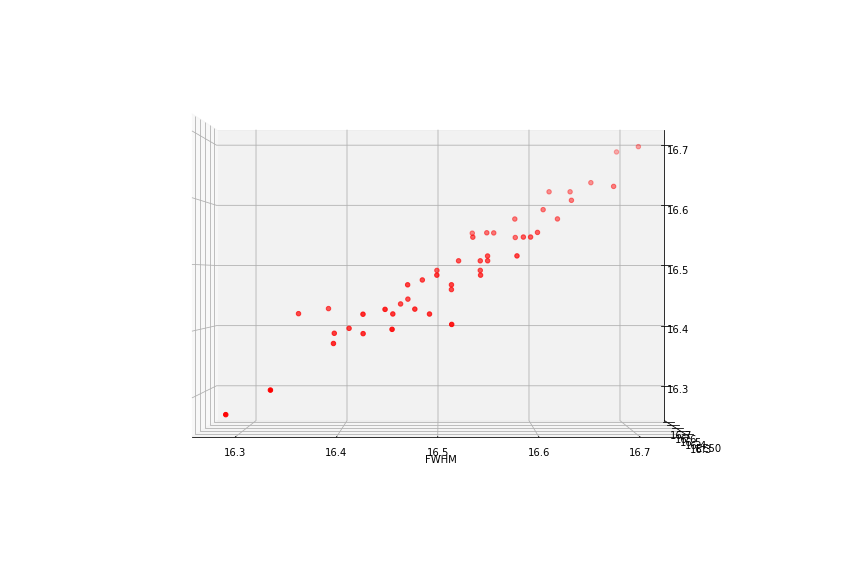

In [86]:
def PlotCorrelation(table):
    sigma = table['Best sigma']
    EE50 = table['Best EE50']
    EE80 = table['Best EE80']
    fig = plt.figure(figsize=(15,10))#(10,8)
    ax = fig.gca(projection='3d')
    ax.scatter(sigma , EE50 , EE80 , c='r', s=20)
    plt.xlabel('FWHM')
    plt.ylabel('EE50')
    ax.view_init(azim=-90,elev=0)


    #plt.set_zlabel('EE80')
    plt.show()
    return
PlotCorrelation(FUV)

In [76]:
FUV.colnames

['name',
 'number',
 't',
 'x',
 'y',
 'Sigma',
 'EE50',
 'EE80',
 'Max pix',
 'Flux',
 'Var pix',
 'Best sigma',
 'Best EE50',
 'Best EE80',
 'Best Maxpix',
 'Best Varpix',
 'MeanBestActuator',
 'VarBestActuator',
 'wavelength',
 'id']

In [139]:
F4

name,number,t,x,y,Sigma,EE50,EE80,Max pix,Flux,Var pix,Best sigma,Best EE50,Best EE80,Best Maxpix,Best Varpix,MeanBestActuator,VarBestActuator,id
str15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
stack11273654.f,273654.0,1898336.0,355.3277282714844,129.49057006835938,2.877657651901245,7.365628719329834,4.149547100067139,39803.5078125,10335192.0,432352416.0,16.8532657623291,16.823116302490234,16.860803604125977,17.200000762939453,nan,16.93429660797119,0.15405110990666532,0
stack11268675.f,268675.0,1898150.0,395.976318359375,278.6889953613281,2.617949962615967,6.98483419418335,4.038667678833008,85243.3515625,10267172.0,551590848.0,16.521602630615234,16.536678314208984,16.52914047241211,16.604516983032227,nan,16.54798460006714,0.03307133155339346,1
stack11268675.f,268675.0,1898150.0,397.3794250488281,278.9085998535156,3.15091609954834,7.041176795959473,4.106997013092041,85242.3984375,11724973.0,551539776.0,16.619598388671875,16.551759719848633,16.574371337890625,16.604522705078125,nan,16.587563037872314,0.026314409277497293,2
stack11257739.f,257739.0,1897740.0,650.424072265625,544.7064208984375,2.8645741939544678,6.002227306365967,3.6627800464630127,91540.921875,10393169.0,627429312.0,16.612060546875,16.42361831665039,16.468843460083008,16.45376968383789,nan,16.489573001861572,0.07256860662258971,3
stack11279045.f,279045.0,1898539.0,751.7808227539062,764.7320556640625,3.448167562484741,7.042413234710693,4.401113033294678,69787.25,10629180.0,531399328.0,16.242713928222656,16.197486877441406,16.22010040283203,nan,nan,16.22010040283203,0.018463866164167633,4
stack11263524.f,263524.0,1897957.0,921.0274047851562,722.9619750976562,2.848173141479492,5.866008758544922,3.617159128189087,54961.8125,9271707.0,404892160.0,15.715075492858887,15.993969917297363,15.993969917297363,nan,nan,15.901005109151205,0.13147209250371064,5


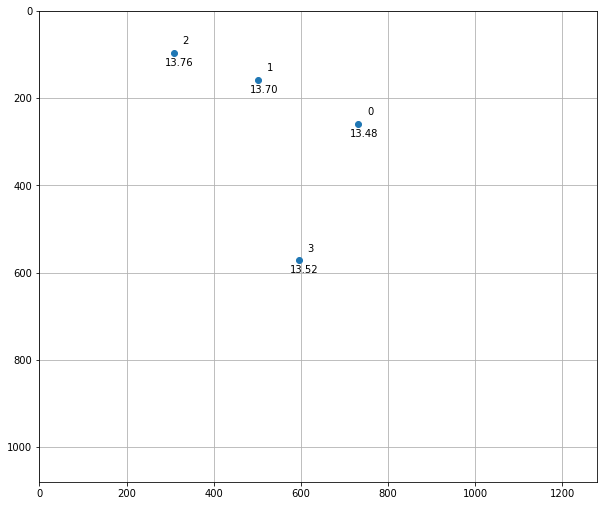

In [54]:
table=F2
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, aspect='equal')
plt.plot(table['x'],table['y'],'o',label = 'EE80')
plt.ylim((1080,0))
plt.xlim((0,1280))
#plt.plot(table['x'],table['Best EE50'],'+',label = 'EE50')
#plt.plot(table['x'],table['Best sigma'],'.',label = 'sigma')
#plt.errorbar(FUV[FUV['wavelength']==202.55]['x'],FUV[FUV['wavelength']==202.55]['MeanBestActuator'],  fmt='o',yerr = FUV[FUV['wavelength']==202.55]['VarBestActuator'],label = '202',c='blue')
#plt.errorbar(FUV[FUV['wavelength']==206.19]['x'],FUV[FUV['wavelength']==206.19]['MeanBestActuator'],  fmt='o',yerr = FUV[FUV['wavelength']==206.19]['VarBestActuator'],label = '206',c='green')
#plt.errorbar(FUV[FUV['wavelength']==213.82]['x'],FUV[FUV['wavelength']==213.82]['MeanBestActuator'],  fmt='o',yerr = FUV[FUV['wavelength']==213.82]['VarBestActuator'],label = '213',c='red')
#plt.plot(table['x'],table['Best Maxpix'],'o',label = 'sigma')
#plt.plot(table['x'],table['Best Varpix'],'o',label = 'sigma')
for line in table:
    plt.text(line['x']+20, line['y']-20, int(line['id']))
    plt.text(line['x']-20, line['y']+30, '%0.2f'%(line['MeanBestActuator']))
#
plt.grid()




In [51]:
FUV

name,number,t,x,y,Sigma,EE50,EE80,Max pix,Flux,Var pix,Best sigma,Best EE50,Best EE80,Best Maxpix,Best Varpix,id,MeanBestActuator,VarBestActuator
str15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64
image000069.fit,69.0,2696600.0,1304.9781494140625,601.2239990234375,2.3873143196105957,5.804841041564941,3.252274990081787,186.09982299804688,16511.037109375,4192.69921875,13.7175874710083,13.692461967468262,13.692461967468262,nan,nan,0,13.700837135314941,0.011844275955925484
image000069.fit,69.0,2696600.0,1475.30126953125,601.4271240234375,2.1969211101531982,4.442595958709717,2.9804413318634033,205.26129150390625,20023.89453125,5339.69384765625,13.705024719238281,13.755276679992676,13.730151176452637,nan,nan,1,13.730150858561197,0.020515277071670165
image000036.fit,36.0,2695693.0,1458.050537109375,115.68717193603516,1.8095389604568481,4.301252365112305,2.6392288208007812,2501.736572265625,174806.328125,358536.4375,13.755276679992676,13.780402183532715,13.780402183532715,nan,nan,2,13.772027015686035,0.011844275955925484
image000036.fit,36.0,2695693.0,1815.8333740234375,115.1136474609375,1.6294491291046143,4.6919379234313965,2.9323275089263916,216.89344787597656,13816.7646484375,4842.46923828125,13.705024719238281,13.604522705078125,13.692461967468262,nan,nan,3,13.667336463928223,0.0447111612364478
image000036.fit,36.0,2695693.0,1985.9493408203125,115.03013610839844,1.6166821718215942,5.084218978881836,2.6395678520202637,247.2844696044922,16749.9453125,6030.51611328125,13.617085456848145,13.127135276794434,13.579397201538086,nan,nan,4,13.441205978393555,0.22261387400504662
image000047.fit,47.0,2696084.0,1336.03271484375,103.04330444335938,2.496262550354004,5.279352188110352,3.42160701751709,206.30726623535156,18184.39453125,4481.3896484375,13.742713928222656,13.353266716003418,13.767839431762695,nan,nan,5,13.621273358662924,0.18978671030791366
image000047.fit,47.0,2696084.0,1506.2401123046875,102.9072265625,2.3089473247528076,5.181147575378418,3.128059148788452,243.99644470214844,21855.078125,5587.8994140625,13.755276679992676,13.516582489013672,13.755276679992676,nan,nan,6,13.675711949666342,0.11252152071406034
image000058.fit,58.0,2696353.0,1293.84765625,524.0980224609375,2.0118110179901123,4.49750280380249,2.737354040145874,2152.51318359375,184667.984375,335929.21875,13.617085456848145,13.679899215698242,13.629648208618164,nan,nan,7,13.642210960388184,0.027138645559986987
image000058.fit,58.0,2696353.0,1650.9127197265625,524.0223999023438,1.9105621576309204,4.790472030639648,2.7371745109558105,199.8689727783203,14672.716796875,4671.44140625,13.629648208618164,14.006532669067383,13.679899215698242,nan,nan,8,13.772026697794596,0.16708496611023033


In [53]:
FUV['MeanBestActuator'].mean()

13.689498730194876